# Import necessary packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from scipy.stats import ttest_rel
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Import data and complete minor clean up for use

In [5]:
data = pd.read_csv("combined_nfl_data.csv")
data

,Unnamed: 0,Date,Day of Week,Winning Team Name,Losing Team,Winning Team Score,Losing Team Score,Type,Year,Winning Rank,...,Winning Dead Cash,Winning Total Cash,Losing Rank,Losing Team Code,Losing Record,Losing Signed Players,Losing Avg Age,Losing Active Cash,Losing Dead Cash,Losing Total Cash
0,0,9/10/20,Thu,Kansas City Chiefs,Houston Texans,34,20,Regular Season,2020,25,...,"$7,823,872","$202,794,195",1,HOU,4-12-0,55,26.3,"$192,489,580","$16,986,836","$261,735,595"
1,1,9/13/20,Sun,Seattle Seahawks,Atlanta Falcons,38,25,Regular Season,2020,18,...,"$10,804,732","$221,174,179",24,ATL,4-12-0,54,26.7,"$193,036,066","$9,433,853","$205,770,850"
2,2,9/13/20,Sun,Buffalo Bills,New York Jets,27,17,Regular Season,2020,15,...,"$10,187,390","$223,199,805",30,NYJ,2-14-0,53,25.3,"$95,099,002","$38,764,517","$179,996,030"
3,3,9/13/20,Sun,Las Vegas Raiders,Carolina Panthers,34,30,Regular Season,2020,7,...,"$8,765,225","$234,936,034",22,CAR,5-11-0,53,26.0,"$174,053,397","$11,825,322","$212,688,413"
4,4,9/13/20,Sun,Chicago Bears,Detroit Lions,27,23,Regular Season,2020,12,...,"$8,116,625","$228,516,276",27,DET,5-11-0,52,26.8,"$141,794,789","$9,075,111","$200,759,182"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,1403,1/19/25,Sun,Philadelphia Eagles,Los Angeles Rams,28,22,Playoff,2024,3,...,"$15,079,844","$328,556,211",31,LAR,10-7-0,53,25.9,"$201,928,187","$7,621,992","$219,121,282"
1404,1404,1/19/25,Sun,Buffalo Bills,Baltimore Ravens,27,25,Playoff,2024,14,...,"$16,268,495","$285,254,387",25,BAL,12-5-0,54,26.6,"$240,249,948","$8,637,184","$258,750,391"
1405,1405,1/26/25,Sun,Philadelphia Eagles,Washington Commanders,55,23,Playoff,2024,3,...,"$15,079,844","$328,556,211",20,WAS,12-5-0,53,27.5,"$251,683,516","$14,561,554","$273,578,070"
1406,1406,1/26/25,Sun,Kansas City Chiefs,Buffalo Bills,32,29,Playoff,2024,11,...,"$15,314,769","$293,739,868",14,BUF,13-4-0,53,26.9,"$262,492,400","$16,268,495","$285,254,387"


In [6]:
data = data.drop(columns=['Unnamed: 0','Winning Team Code','Losing Team Code'], errors='ignore')
data

,Date,Day of Week,Winning Team Name,Losing Team,Winning Team Score,Losing Team Score,Type,Year,Winning Rank,Winning Record,...,Winning Active Cash,Winning Dead Cash,Winning Total Cash,Losing Rank,Losing Record,Losing Signed Players,Losing Avg Age,Losing Active Cash,Losing Dead Cash,Losing Total Cash
0,9/10/20,Thu,Kansas City Chiefs,Houston Texans,34,20,Regular Season,2020,25,14-2-0,...,"$182,213,498","$7,823,872","$202,794,195",1,4-12-0,55,26.3,"$192,489,580","$16,986,836","$261,735,595"
1,9/13/20,Sun,Seattle Seahawks,Atlanta Falcons,38,25,Regular Season,2020,18,12-4-0,...,"$190,854,794","$10,804,732","$221,174,179",24,4-12-0,54,26.7,"$193,036,066","$9,433,853","$205,770,850"
2,9/13/20,Sun,Buffalo Bills,New York Jets,27,17,Regular Season,2020,15,13-3-0,...,"$206,918,396","$10,187,390","$223,199,805",30,2-14-0,53,25.3,"$95,099,002","$38,764,517","$179,996,030"
3,9/13/20,Sun,Las Vegas Raiders,Carolina Panthers,34,30,Regular Season,2020,7,8-8-0,...,"$193,781,662","$8,765,225","$234,936,034",22,5-11-0,53,26.0,"$174,053,397","$11,825,322","$212,688,413"
4,9/13/20,Sun,Chicago Bears,Detroit Lions,27,23,Regular Season,2020,12,8-8-0,...,"$193,338,682","$8,116,625","$228,516,276",27,5-11-0,52,26.8,"$141,794,789","$9,075,111","$200,759,182"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,1/19/25,Sun,Philadelphia Eagles,Los Angeles Rams,28,22,Playoff,2024,3,14-3-0,...,"$294,433,688","$15,079,844","$328,556,211",31,10-7-0,53,25.9,"$201,928,187","$7,621,992","$219,121,282"
1404,1/19/25,Sun,Buffalo Bills,Baltimore Ravens,27,25,Playoff,2024,14,13-4-0,...,"$262,492,400","$16,268,495","$285,254,387",25,12-5-0,54,26.6,"$240,249,948","$8,637,184","$258,750,391"
1405,1/26/25,Sun,Philadelphia Eagles,Washington Commanders,55,23,Playoff,2024,3,14-3-0,...,"$294,433,688","$15,079,844","$328,556,211",20,12-5-0,53,27.5,"$251,683,516","$14,561,554","$273,578,070"
1406,1/26/25,Sun,Kansas City Chiefs,Buffalo Bills,32,29,Playoff,2024,11,15-2-0,...,"$266,722,742","$15,314,769","$293,739,868",14,13-4-0,53,26.9,"$262,492,400","$16,268,495","$285,254,387"


In [8]:
data.columns

Index(['Date', 'Day of Week', 'Winning Team Name', 'Losing Team',
       'Winning Team Score', 'Losing Team Score', 'Type', 'Year',
       'Winning Rank', 'Winning Record', 'Winning Signed Players',
       'Winning Avg Age', 'Winning Active Cash', 'Winning Dead Cash',
       'Winning Total Cash', 'Losing Rank', 'Losing Record',
       'Losing Signed Players', 'Losing Avg Age', 'Losing Active Cash',
       'Losing Dead Cash', 'Losing Total Cash'],
      dtype='object')

# Research Question 1: How does team salary relate to team success (wins)?

In [13]:
# convert salaries from string to numbers
data['Winning Total Cash'] = data['Winning Total Cash'].str.replace('$', '').str.replace(',', '').astype(float)
data['Losing Total Cash'] = data['Losing Total Cash'].str.replace('$', '').str.replace(',', '').astype(float)

In [15]:
# 5 worst performing teams each year
data['Losing Wins'] = data['Losing Record'].str.extract(r'(\d+)-')[0].astype(int)
losing_team_stats = data.groupby(['Year', 'Losing Team']).agg({
    'Losing Wins': 'max',  
    'Losing Total Cash': 'max'
}).reset_index()

In [17]:
losing_team_stats['Rank'] = losing_team_stats.groupby('Year')['Losing Wins'].rank(method='first', ascending=True)
bottom5_per_year = losing_team_stats[losing_team_stats['Rank'] <= 5]

# Average salary of the bottom 5 teams (most losses) for each season

In [20]:
print("Average Losing Team Salaries (Bottom 5 Teams) by Year:\n")

for year in sorted(bottom5_per_year['Year'].unique()):
    year_data = bottom5_per_year[bottom5_per_year['Year'] == year]
    avg_salary = year_data['Losing Total Cash'].mean()
    print(f"Year {year}: Avg Salary (Bottom 5 Teams) = ${avg_salary:,.2f}")

Average Losing Team Salaries (Bottom 5 Teams) by Year:

Year 2020: Avg Salary (Bottom 5 Teams) = $210,093,643.20
Year 2021: Avg Salary (Bottom 5 Teams) = $202,252,742.20
Year 2022: Avg Salary (Bottom 5 Teams) = $208,283,679.20
Year 2023: Avg Salary (Bottom 5 Teams) = $222,244,271.20
Year 2024: Avg Salary (Bottom 5 Teams) = $280,404,391.60


# Average salary of the top 5 teams (most wins) for each season

In [23]:
data['Wins'] = data['Winning Record'].str.extract(r'(\d+)-')[0].astype(int)

winning_team_stats = data.groupby(['Year', 'Winning Team Name']).agg({
    'Wins': 'max',
    'Winning Total Cash': 'max'
}).reset_index()

winning_team_stats['Rank'] = winning_team_stats.groupby('Year')['Wins'].rank(method='first', ascending=False)

top5_per_year = winning_team_stats[winning_team_stats['Rank'] <= 5]

avg_top5_per_year = top5_per_year.groupby('Year').agg({
    'Wins': 'mean',
    'Winning Total Cash': 'mean'
}).reset_index()
avg_top5_per_year['Avg Salary (Millions)'] = avg_top5_per_year['Winning Total Cash']

avg_top5_per_year['Avg Salary (Millions)'] = avg_top5_per_year['Avg Salary (Millions)'].apply(lambda x: f"${x:,.2f}")

print(avg_top5_per_year[['Year', 'Wins', 'Avg Salary (Millions)']])

   Year  Wins Avg Salary (Millions)
0  2020  12.8       $218,837,636.40
1  2021  12.4       $221,952,744.40
2  2022  13.4       $237,280,078.40
3  2023  12.0       $263,854,827.00
4  2024  14.2       $300,590,973.20


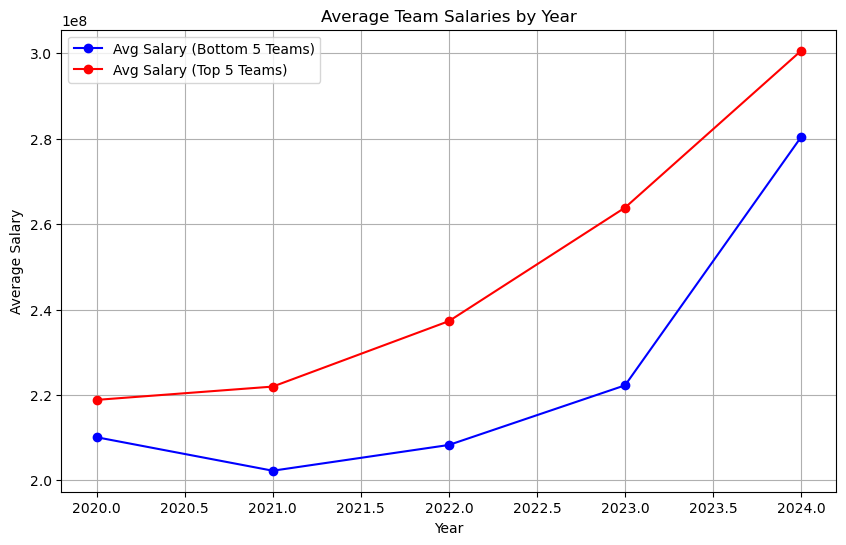

In [25]:
# Calculate average salaries for bottom 5 teams by year
avg_bottom5_salaries_by_year = bottom5_per_year.groupby('Year')['Losing Total Cash'].mean()

# Calculate average salaries for top 5 teams by year
avg_top5_salaries_by_year = avg_top5_per_year.groupby('Year')['Winning Total Cash'].mean()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(avg_bottom5_salaries_by_year.index, avg_bottom5_salaries_by_year.values, marker='o', linestyle='-', color='b', label='Avg Salary (Bottom 5 Teams)')
plt.plot(avg_top5_salaries_by_year.index, avg_top5_salaries_by_year.values, marker='o', linestyle='-', color='r', label='Avg Salary (Top 5 Teams)')
plt.title('Average Team Salaries by Year')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.legend()
plt.grid(True)
plt.show()


# Difference between the top and bottom teams salaries

In [28]:
# difference between top 5 and bottom 5
print("Difference in Average Salary (Top 5 Winning - Bottom 5 Losing Teams):\n")

# Loop through all years present in both datasets
years = sorted(set(top5_per_year['Year']).intersection(bottom5_per_year['Year']))

for year in years:
    top_avg = top5_per_year[top5_per_year['Year'] == year]['Winning Total Cash'].mean()
    bottom_avg = bottom5_per_year[bottom5_per_year['Year'] == year]['Losing Total Cash'].mean()
    diff = top_avg - bottom_avg
    print(f"Year {year}:")
    print(f"Difference= ${diff / 1_000_000:,.2f} Million")

Difference in Average Salary (Top 5 Winning - Bottom 5 Losing Teams):

Year 2020:
Difference= $8.74 Million
Year 2021:
Difference= $19.70 Million
Year 2022:
Difference= $29.00 Million
Year 2023:
Difference= $41.61 Million
Year 2024:
Difference= $20.19 Million


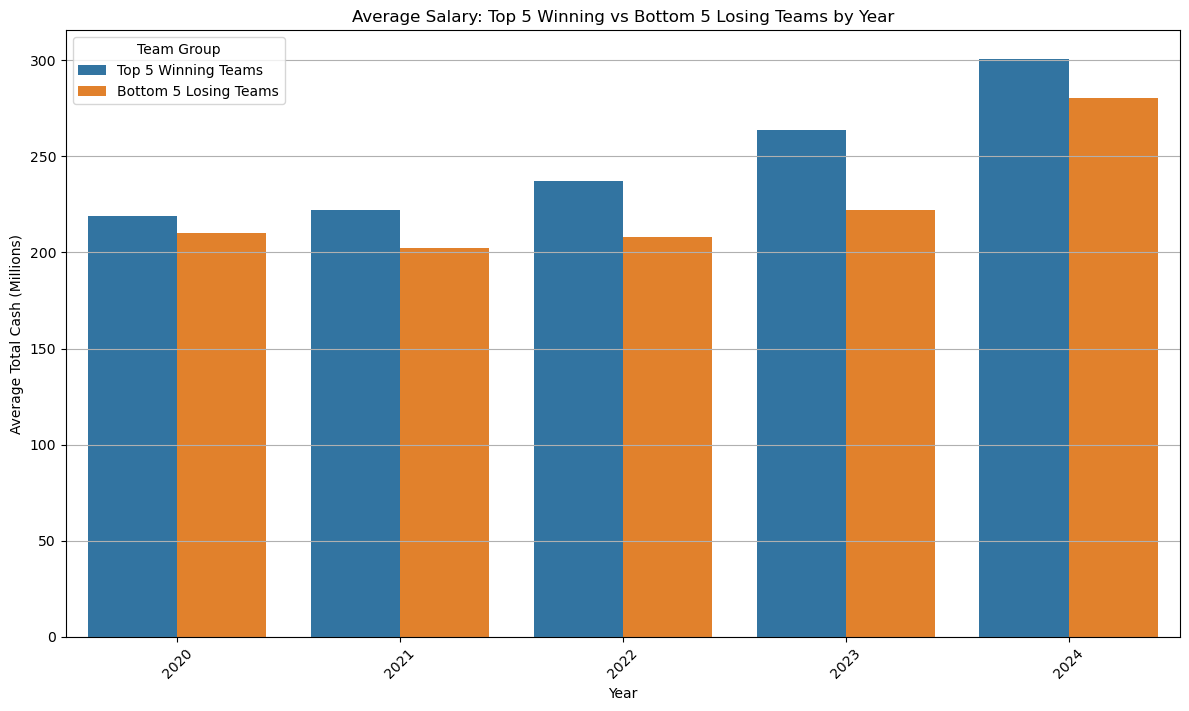

In [30]:
avg_top5 = top5_per_year.groupby('Year')['Winning Total Cash'].mean().reset_index()
avg_top5['Group'] = 'Top 5 Winning Teams'
avg_top5['Avg Salary (Millions)'] = avg_top5['Winning Total Cash'] / 1_000_000

avg_bottom5 = bottom5_per_year.groupby('Year')['Losing Total Cash'].mean().reset_index()
avg_bottom5['Group'] = 'Bottom 5 Losing Teams'
avg_bottom5['Avg Salary (Millions)'] = avg_bottom5['Losing Total Cash'] / 1_000_000


plot_df = pd.concat([avg_top5[['Year', 'Group', 'Avg Salary (Millions)']],
                     avg_bottom5[['Year', 'Group', 'Avg Salary (Millions)']]])

plot_df['Year'] = plot_df['Year'].astype(int)

plt.figure(figsize=(12, 7))
sns.barplot(data=plot_df, x='Year', y='Avg Salary (Millions)', hue='Group', errorbar=None)
plt.title("Average Salary: Top 5 Winning vs Bottom 5 Losing Teams by Year")
plt.ylabel("Average Total Cash (Millions)")
plt.xlabel("Year")
plt.legend(title='Team Group')
plt.grid(axis='y')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [32]:
data_ml = data[['Wins', 'Winning Avg Age', 'Winning Signed Players', 'Winning Total Cash']].dropna()
X = data_ml[['Winning Avg Age', 'Winning Signed Players', 'Winning Total Cash']]
y = data_ml['Wins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)

print("R Square score:", model.score(X_test, y_test))
# explains about 1.3% of the variance in the model

R Square score: 0.011993641889206041


# Research Question 2: Do teams with higher salaries perform better in the regular season or postseason?

## Superbowl winners:

In [36]:
data['Date'] = pd.to_datetime(data['Date'])

# Keep only Playoff games
playoff_games = data[data['Type'] == 'Playoff']

# For each Year, get the latest Playoff game
superbowl_games = playoff_games.sort_values(['Year', 'Date']).groupby('Year').tail(1)
superbowl_salary_caps = superbowl_games[['Year', 'Winning Team Name', 'Winning Total Cash']].copy()

superbowl_salary_caps['Winning Total Cash (Millions)'] = superbowl_salary_caps['Winning Total Cash']
superbowl_salary_caps['Superbowl Winner Total Cash'] = superbowl_salary_caps['Winning Total Cash (Millions)'].apply(lambda x: f"${x:,.2f}")

print(superbowl_salary_caps[['Year', 'Winning Team Name', 'Winning Total Cash']])

      Year     Winning Team Name  Winning Total Cash
268   2020  Tampa Bay Buccaneers         216934740.0
553   2021      Los Angeles Rams         193378960.0
837   2022    Kansas City Chiefs         223117521.0
1122  2023    Kansas City Chiefs         240100335.0
1407  2024   Philadelphia Eagles         328556211.0


/var/folders/zd/46rdsbcd33b6hgg4dy4k7d2m0000gn/T/ipykernel_19881/2355763823.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


## Superbowl Winners Salary vs League Average Salary:

In [39]:
winning_salaries = data[['Year', 'Winning Team Name', 'Winning Total Cash']].rename(
    columns={'Winning Team Name': 'Team', 'Winning Total Cash': 'Total Cash'})
losing_salaries = data[['Year', 'Losing Team', 'Losing Total Cash']].rename(
    columns={'Losing Team': 'Team', 'Losing Total Cash': 'Total Cash'})

all_salaries = pd.concat([winning_salaries, losing_salaries])
all_salaries = all_salaries.drop_duplicates(subset=['Year', 'Team'])
avg_salary_per_season = all_salaries.groupby('Year')['Total Cash'].mean().reset_index()
avg_salary_per_season.rename(columns={'Total Cash': 'League Average Salary'}, inplace=True)
comparison = pd.merge(
    superbowl_salary_caps[['Year', 'Winning Team Name', 'Superbowl Winner Total Cash']], 
    avg_salary_per_season, 
    on='Year'
)
comparison['League Average Salary'] = comparison['League Average Salary']
comparison['League Average Salary'] = comparison['League Average Salary'].apply(lambda x: f"${x:,.2f}")
print(comparison[['Year', 'Winning Team Name', 'Superbowl Winner Total Cash', 'League Average Salary']])

   Year     Winning Team Name Superbowl Winner Total Cash  \
0  2020  Tampa Bay Buccaneers             $216,934,740.00   
1  2021      Los Angeles Rams             $193,378,960.00   
2  2022    Kansas City Chiefs             $223,117,521.00   
3  2023    Kansas City Chiefs             $240,100,335.00   
4  2024   Philadelphia Eagles             $328,556,211.00   

  League Average Salary  
0       $218,858,603.22  
1       $207,951,302.34  
2       $232,779,180.25  
3       $245,945,041.66  
4       $280,409,320.84  


In [41]:
comparison['Winner Salary'] = comparison['Superbowl Winner Total Cash'].replace('[\$,]', '', regex=True).astype(float)
comparison['League Avg Salary'] = comparison['League Average Salary'].replace('[\$,]', '', regex=True).astype(float)

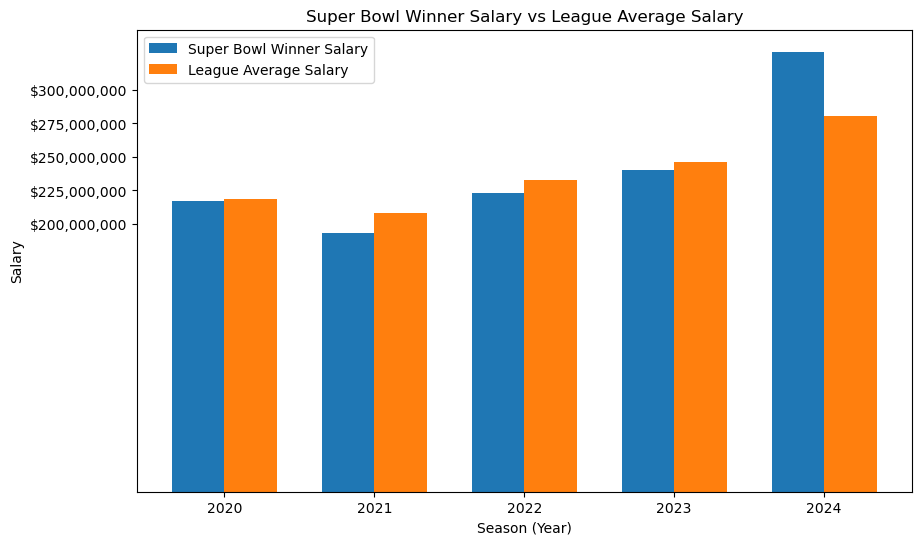

In [43]:
years = comparison['Year']
x = np.arange(len(years))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

rects1 = ax.bar(x - width/2, comparison['Winner Salary'], width, label='Super Bowl Winner Salary')
rects2 = ax.bar(x + width/2, comparison['League Avg Salary'], width, label='League Average Salary')

ax.set_ylabel('Salary')
ax.set_xlabel('Season (Year)')
ax.set_title('Super Bowl Winner Salary vs League Average Salary')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()

ax.set_yticks(np.arange(200_000_000, 310_000_000, 25_000_000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
plt.show()

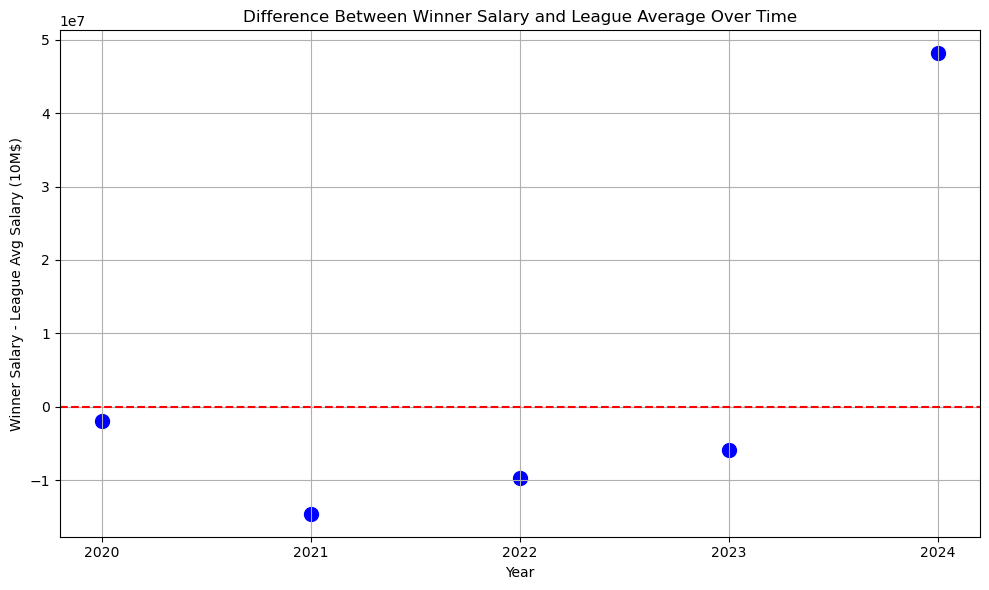

In [45]:
# Create a new column: difference between winner salary and league average
comparison['Salary Difference'] = comparison['Winner Salary'] - comparison['League Avg Salary']

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(comparison['Year'], comparison['Salary Difference'], color='blue', s=100)

# Add a horizontal line at 0 for reference
plt.axhline(0, color='red', linestyle='--')

# Show only whole years
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))  # Tick every 1 year
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))

# Labels
plt.title('Difference Between Winner Salary and League Average Over Time')
plt.xlabel('Year')
plt.ylabel('Winner Salary - League Avg Salary (10M$)')
plt.grid(True)
plt.tight_layout()
plt.show()

## T-test

In [48]:
# hypothesis test
winner_salaries = comparison['Winner Salary']
league_avg_salaries = comparison['League Avg Salary']

t_stat, p_value = ttest_rel(winner_salaries, league_avg_salaries)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference between Super Bowl Winner salaries and League Average salaries.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference between Winner salaries and League Average salaries.")

T-Statistic: 0.2827
P-Value: 0.7915
Result: Fail to reject the null hypothesis. No significant difference between Winner salaries and League Average salaries.
